## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2025-11-08 13:22:48.160153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762608168.373062      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762608168.432589      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preprossing

### Training Image preprossing

In [2]:
train_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1762608216.134271      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


### Validation Image Preprossing

In [3]:
valid_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[ 91.25  81.5   94.25]
   [ 80.75  72.25  83.75]
   [ 86.    76.25  89.  ]
   ...
   [ 74.25  65.75  79.25]
   [ 68.75  59.75  73.75]
   [ 76.25  67.25  81.25]]

  [[167.75 156.75 170.75]
   [160.75 149.75 163.75]
   [163.25 152.25 166.25]
   ...
   [125.5  114.5  130.5 ]
   [149.75 138.75 154.75]
   [150.5  139.5  155.5 ]]

  [[168.5  157.5  171.5 ]
   [157.   146.   160.  ]
   [158.25 147.25 161.25]
   ...
   [131.5  120.5  137.5 ]
   [132.5  121.5  138.5 ]
   [127.25 116.25 133.25]]

  ...

  [[169.75 160.75 181.75]
   [167.5  158.5  179.5 ]
   [167.5  158.5  179.5 ]
   ...
   [137.5  129.5  153.5 ]
   [138.25 130.25 154.25]
   [136.75 128.75 152.75]]

  [[169.   160.   181.  ]
   [168.5  159.5  180.5 ]
   [168.5  159.5  180.5 ]
   ...
   [141.25 133.25 157.25]
   [144.5  136.5  160.5 ]
   [143.25 135.25 159.25]]

  [[169.75 160.75 181.75]
   [170.75 161.75 182.75]
   [170.75 161.75 182.75]
   ...
   [141.5  133.5  157.5 ]
   [142.75 134.75 158.75]
   [139.   131.   15

### To avoide overshooting
1. Choose smaller learn rate(default is 0.001, we are taking 0.0001)
2. There may be Undefitting, so increase the numer of neurons
3. Add more convolution layers, to extract more details from image. There may be a confusion due to lack of feature.

# Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

### Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))#To avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))#To avoid overfitting

### Output layer

In [17]:
model.add(Dense(units=38,activation='softmax'))

# Compiliing Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### Notes:
1.model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) Causes overshooting of loss function.
2. model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) decreases the overshooting but does not eliminate it, but rather makes the fluctuations in loss function more noticeable.
3. Adding a new convulation layer, and increasing the number of nurons from 1024 to 1500.

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1762608227.342156      64 service.cc:148] XLA service 0x7b3de401a360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762608227.343010      64 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762608227.944027      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


   5/2197 ━━━━━━━━━━━━━━━━━━━━ 1:06 30ms/step - accuracy: 0.0471 - loss: 5.0175

I0000 00:00:1762608234.456363      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 154s 65ms/step - accuracy: 0.4099 - loss: 2.1100 - val_accuracy: 0.8232 - val_loss: 0.5597
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.8351 - loss: 0.5242 - val_accuracy: 0.8999 - val_loss: 0.3083
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 33ms/step - accuracy: 0.9064 - loss: 0.2929 - val_accuracy: 0.9372 - val_loss: 0.1966
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9315 - loss: 0.2099 - val_accuracy: 0.9432 - val_loss: 0.1753
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9488 - loss: 0.1564 - val_accuracy: 0.9569 - val_loss: 0.1434
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9622 - loss: 0.1140 - val_accuracy: 0.9407 - val_loss: 0.1840
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9676 - loss: 0.0998 - val_accuracy: 0.9604 - val_loss: 0.1271
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9756 - loss: 0.0

# Model Evaluation

In [21]:
#Model evalution on training_set
taining_loss,training_accuracy = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.9861 - loss: 0.0439


In [22]:
print(taining_loss,training_accuracy)

0.037098199129104614 0.9880645871162415


In [23]:
#Model evalution on validation_set
valid_loss,valid_accuracy = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9625 - loss: 0.1387


In [24]:
print(valid_loss,valid_accuracy)

0.13770051300525665 0.9628385901451111


### Saving the model

In [25]:
model.save("trained_model.h5")

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.6071555614471436,
  0.8581548929214478,
  0.9134078025817871,
  0.9380325675010681,
  0.9535670876502991,
  0.9644355773925781,
  0.9694288372993469,
  0.976100742816925,
  0.979714035987854,
  0.9811224341392517],
 'loss': [1.3377293348312378,
  0.44774025678634644,
  0.27006587386131287,
  0.18944048881530762,
  0.14160412549972534,
  0.10914268344640732,
  0.09351781755685806,
  0.0745106115937233,
  0.06306806206703186,
  0.05784427002072334],
 'val_accuracy': [0.8232415318489075,
  0.899897575378418,
  0.9372296929359436,
  0.9432051181793213,
  0.9569200873374939,
  0.9407011270523071,
  0.9604484438896179,
  0.9637491703033447,
  0.960050106048584,
  0.9628385901451111],
 'val_loss': [0.5597114562988281,
  0.3083219528198242,
  0.19658513367176056,
  0.17530913650989532,
  0.14335955679416656,
  0.18404270708560944,
  0.12706440687179565,
  0.12326018512248993,
  0.1394776999950409,
  0.13770054280757904]}

In [28]:
#Reacoding the history
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy visualization


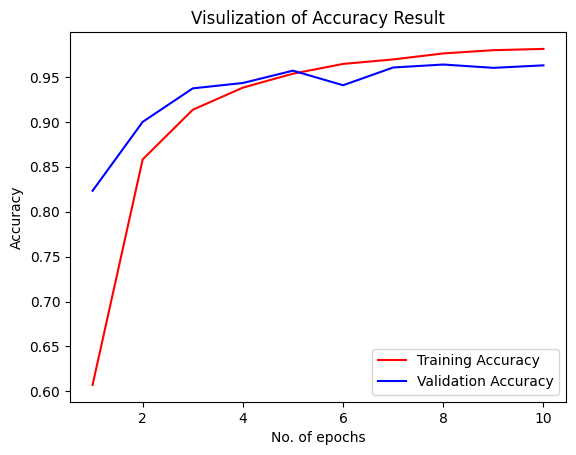

In [29]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Visulization of Accuracy Result")
plt.legend()
plt.show()

### Some other metric to evaluate the model

In [30]:
class_name =validation_set.class_names


In [31]:
valid_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

test_set= tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step


(array([[9.9999583e-01, 1.1337155e-13, 1.2770922e-13, ..., 7.6440019e-20,
         8.4077287e-20, 1.4682433e-16],
        [9.9999821e-01, 1.3169470e-06, 2.7338174e-08, ..., 5.7978843e-17,
         3.4239000e-14, 8.2707680e-13],
        [1.0000000e+00, 7.7432470e-16, 8.3499562e-17, ..., 1.0954432e-24,
         2.9269239e-22, 3.0636539e-18],
        ...,
        [8.5472640e-10, 7.5861068e-13, 6.3281624e-09, ..., 3.3020389e-11,
         1.8087182e-12, 9.9999607e-01],
        [3.7441543e-12, 1.3564495e-15, 8.5537645e-12, ..., 2.5754750e-14,
         2.5371183e-14, 1.0000000e+00],
        [2.0135423e-13, 1.8850989e-15, 3.3911548e-12, ..., 3.1432355e-15,
         5.1598862e-13, 9.9999285e-01]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
#Precision, recall and f1-score
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.97       440
                                   Apple___healthy       0.88      0.99      0.93       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.95      1.00      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

## Confusion Matrix

In [37]:
cm = confusion_matrix(Y_true,predicted_categories)
cm,cm.shape

(array([[476,   1,   1, ...,   0,   0,   0],
        [  1, 487,   0, ...,   0,   0,   0],
        [  0,   0, 431, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 489,   0,   0],
        [  0,   0,   0, ...,   0, 444,   0],
        [  0,   0,   1, ...,   0,   0, 470]]),
 (38, 38))

## Confusion Matrix Visualization

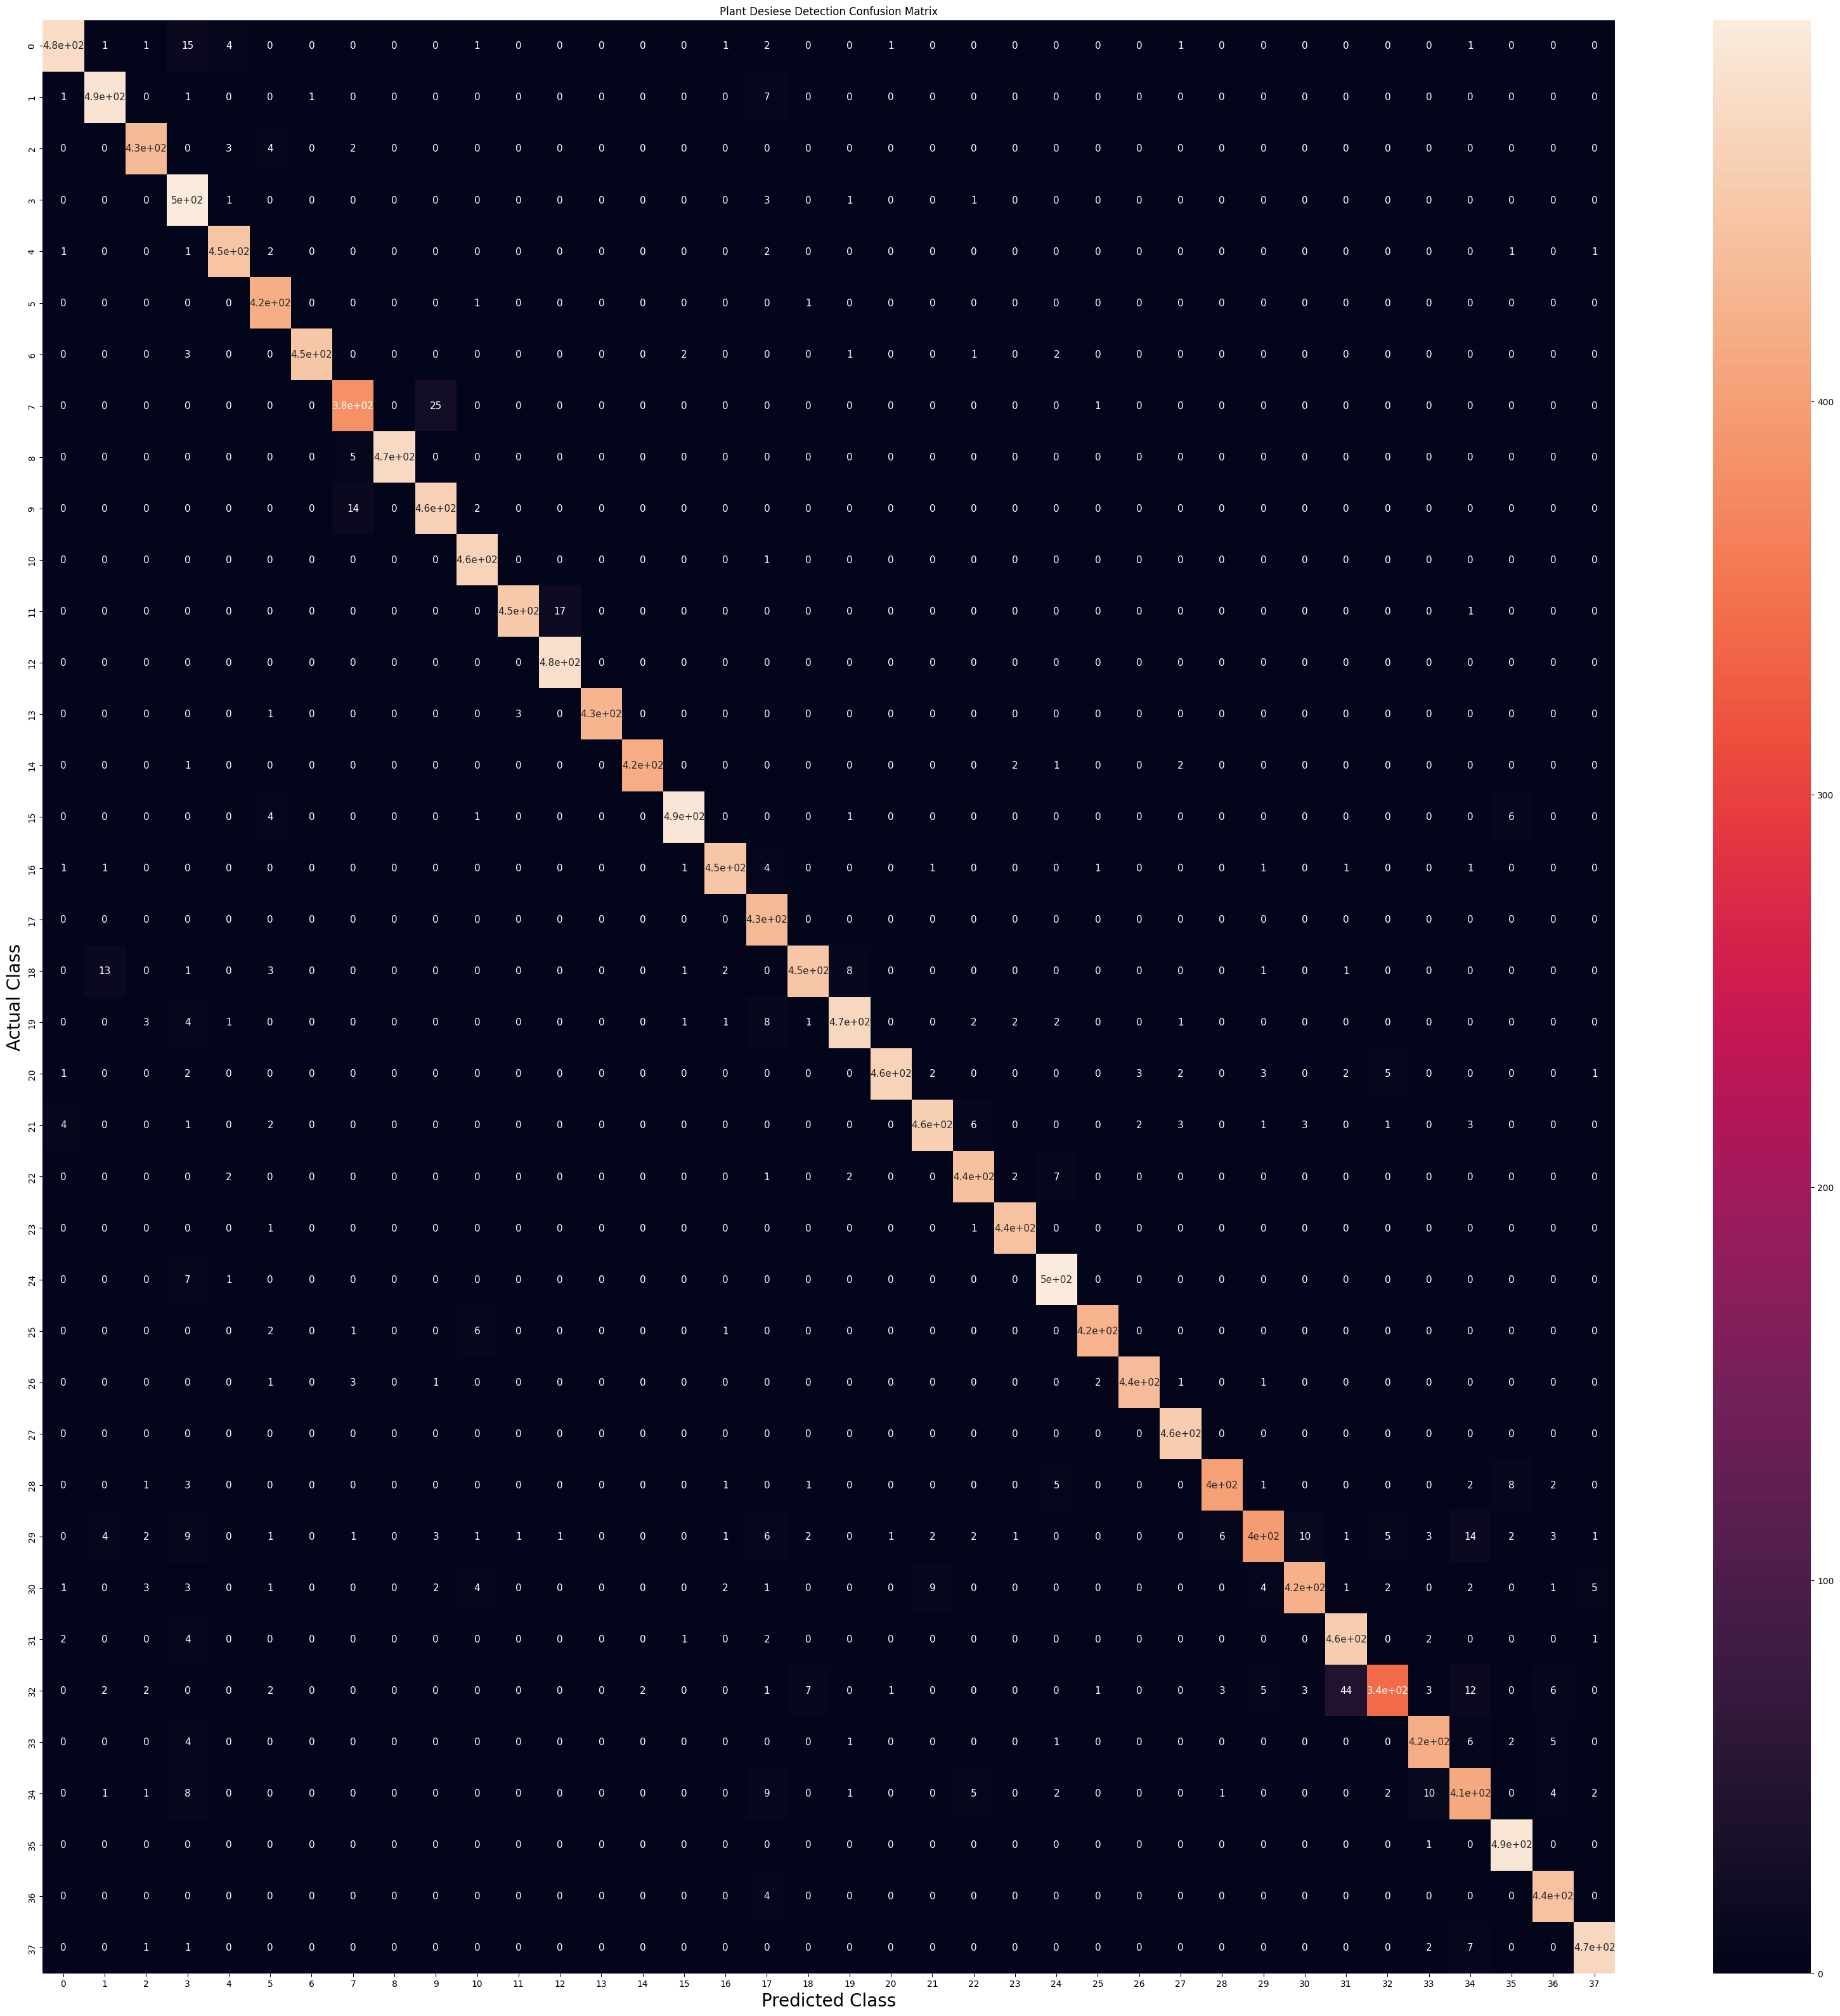

In [38]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':11})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Plant Desiese Detection Confusion Matrix')

plt.show()